<b>Data Processing</b>

In [32]:
# Data Processing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [33]:
df=pd.read_csv('./airport.csv')
df.drop("To Date", axis=1, inplace=True)
df.head()

,From Date,NH3,SO2,CO,Ozone,Benzene,PM2.5,PM10,NO,NO2,NOx,Eth-Benzene,MP-Xylene,O,WS,WD,BP,AT
0,01-06-2019 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-06-2019 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-06-2019 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-06-2019 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-06-2019 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


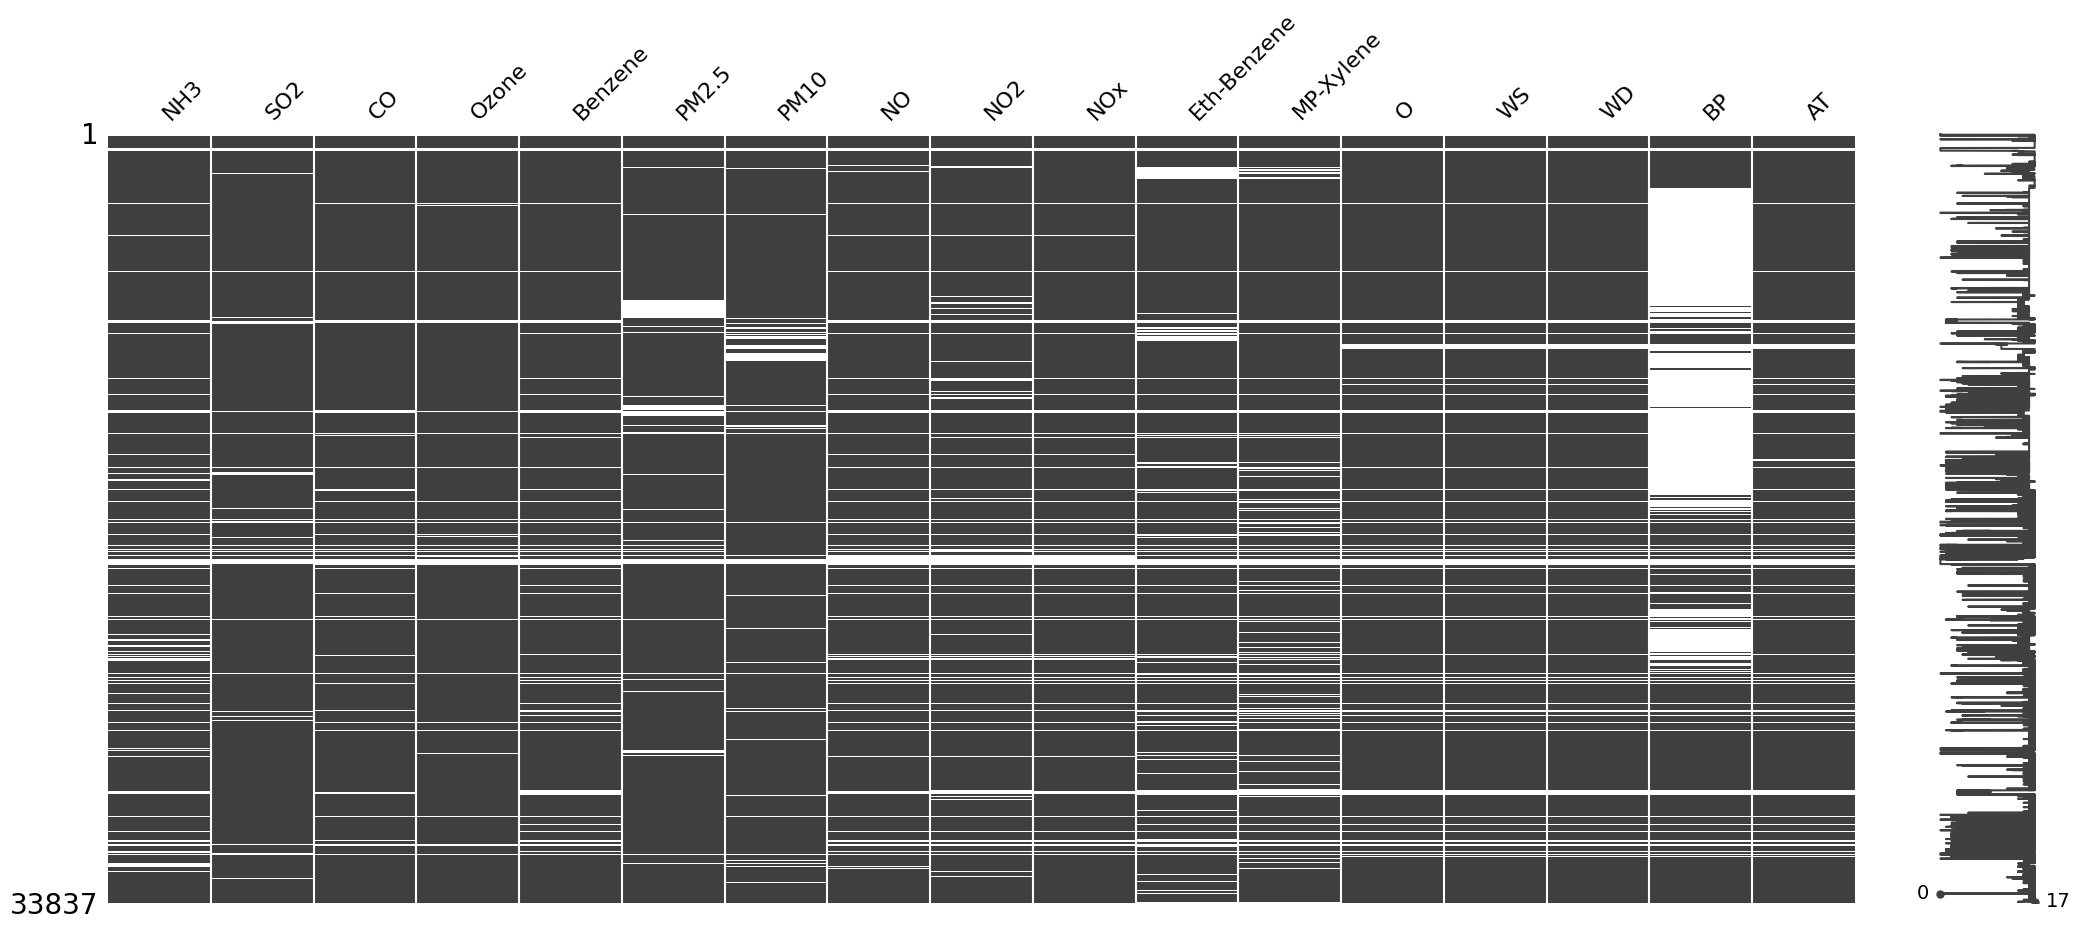

In [34]:
msno.matrix(df.iloc[:,1:])
plt.show()

In [35]:
df.drop("BP", axis=1, inplace=True)

<AxesSubplot:>

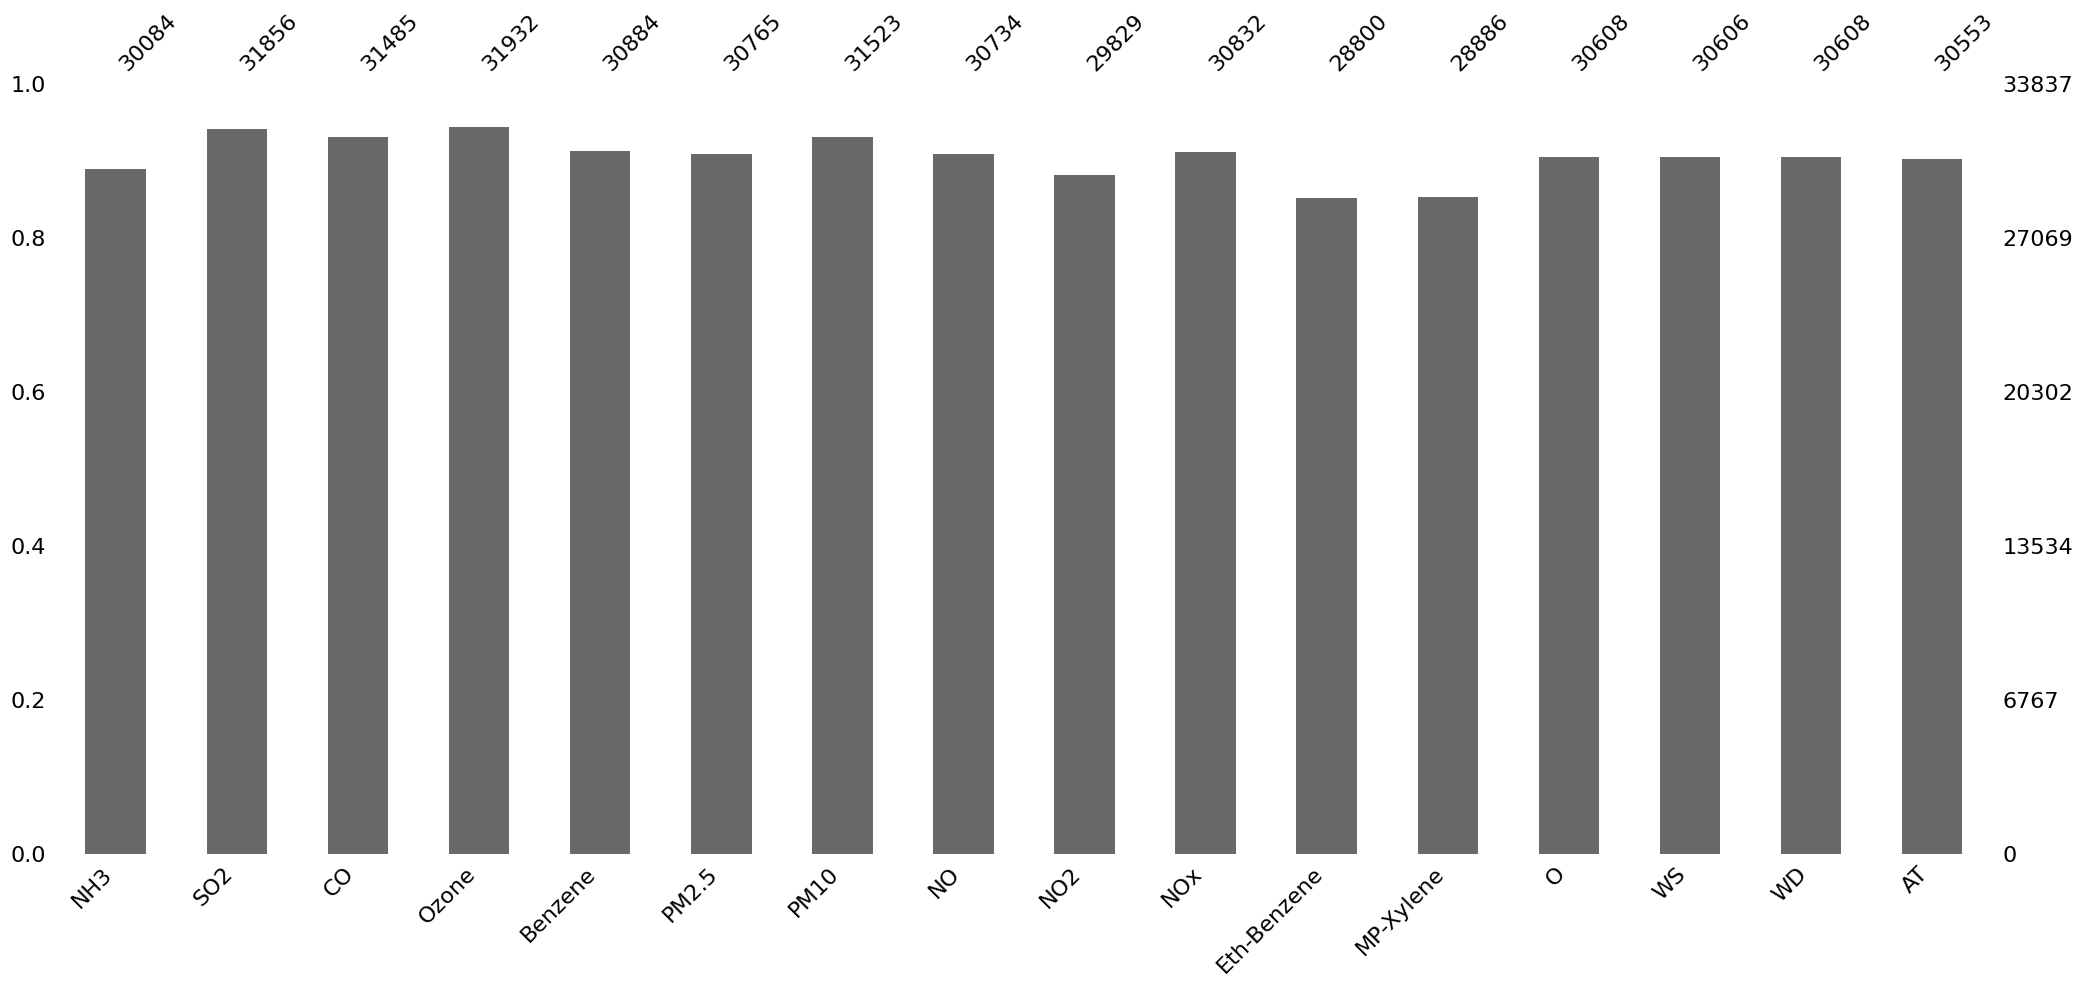

In [36]:
msno.bar(df.iloc[:,1:])

In [37]:
df['HOUR']=df['From Date'].apply(lambda x: int(x.split(' ')[1][:2]))
df.HOUR.head()

0    0
1    1
2    2
3    3
4    4
Name: HOUR, dtype: int64

In [38]:
df['From Date'] = pd.to_datetime(df['From Date'], format = '%d-%m-%Y %H:%M')
df['From Date']

0       2019-06-01 00:00:00
1       2019-06-01 01:00:00
2       2019-06-01 02:00:00
3       2019-06-01 03:00:00
4       2019-06-01 04:00:00
                ...        
33832   2023-04-10 16:00:00
33833   2023-04-10 17:00:00
33834   2023-04-10 18:00:00
33835   2023-04-10 19:00:00
33836   2023-04-10 20:00:00
Name: From Date, Length: 33837, dtype: datetime64[ns]

In [39]:
print('Count of missing values:\n',df.shape[0]-df.count())

Count of missing values:
 From Date         0
NH3            3753
SO2            1981
CO             2352
Ozone          1905
Benzene        2953
PM2.5          3072
PM10           2314
NO             3103
NO2            4008
NOx            3005
Eth-Benzene    5037
MP-Xylene      4951
O              3229
WS             3231
WD             3229
AT             3284
HOUR              0
dtype: int64


In [41]:
df.set_index('From Date',inplace=True)
df['MONTH']=df.index.month     #Create month column (Run once)
df.reset_index(inplace=True)

In [42]:
# Filling Missing Values
cols=['NH3','SO2','CO','Ozone','Benzene','PM2.5','PM10','NO','NO2','NOx','Eth-Benzene','MP-Xylene','O','WS','WD','AT']
for col in cols:
  df[col]=df[col].fillna(df.groupby(['MONTH','HOUR'])[col].transform('mean'))

In [43]:
# Show that the missing values are filled
print('Count of missing values:\n',df.shape[0]-df.count())

Count of missing values:
 From Date      0
NH3            0
SO2            0
CO             0
Ozone          0
Benzene        0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
Eth-Benzene    0
MP-Xylene      0
O              0
WS             0
WD             0
AT             0
HOUR           0
MONTH          0
dtype: int64


In [44]:
# Save the cleaned data
df.to_csv('./airport_cleaned.csv', index=False)

Preprocessing Other files

In [45]:
df=pd.read_csv('./chakala.csv')
df.drop("To Date", axis=1, inplace=True)

,From Date,PM2.5,PM10,NO,NO2,SO2,CO,Ozone,AT,RH,WS,WD
0,08-12-2020 09:00,90.16,164.92,27.58,42.72,38.77,0.73,7.00,28.50,33.40,0.24,226.94
1,08-12-2020 10:00,92.55,179.31,18.75,38.75,38.93,0.68,19.25,29.50,32.26,0.22,82.35
2,08-12-2020 11:00,72.86,185.50,13.54,35.00,33.12,0.61,38.25,30.89,31.89,0.16,49.02
3,08-12-2020 12:00,70.44,166.99,16.41,19.86,35.42,0.55,56.00,32.75,29.67,0.18,124.27
4,08-12-2020 13:00,58.97,160.17,9.31,17.02,34.98,0.38,56.00,33.35,28.29,0.21,170.20


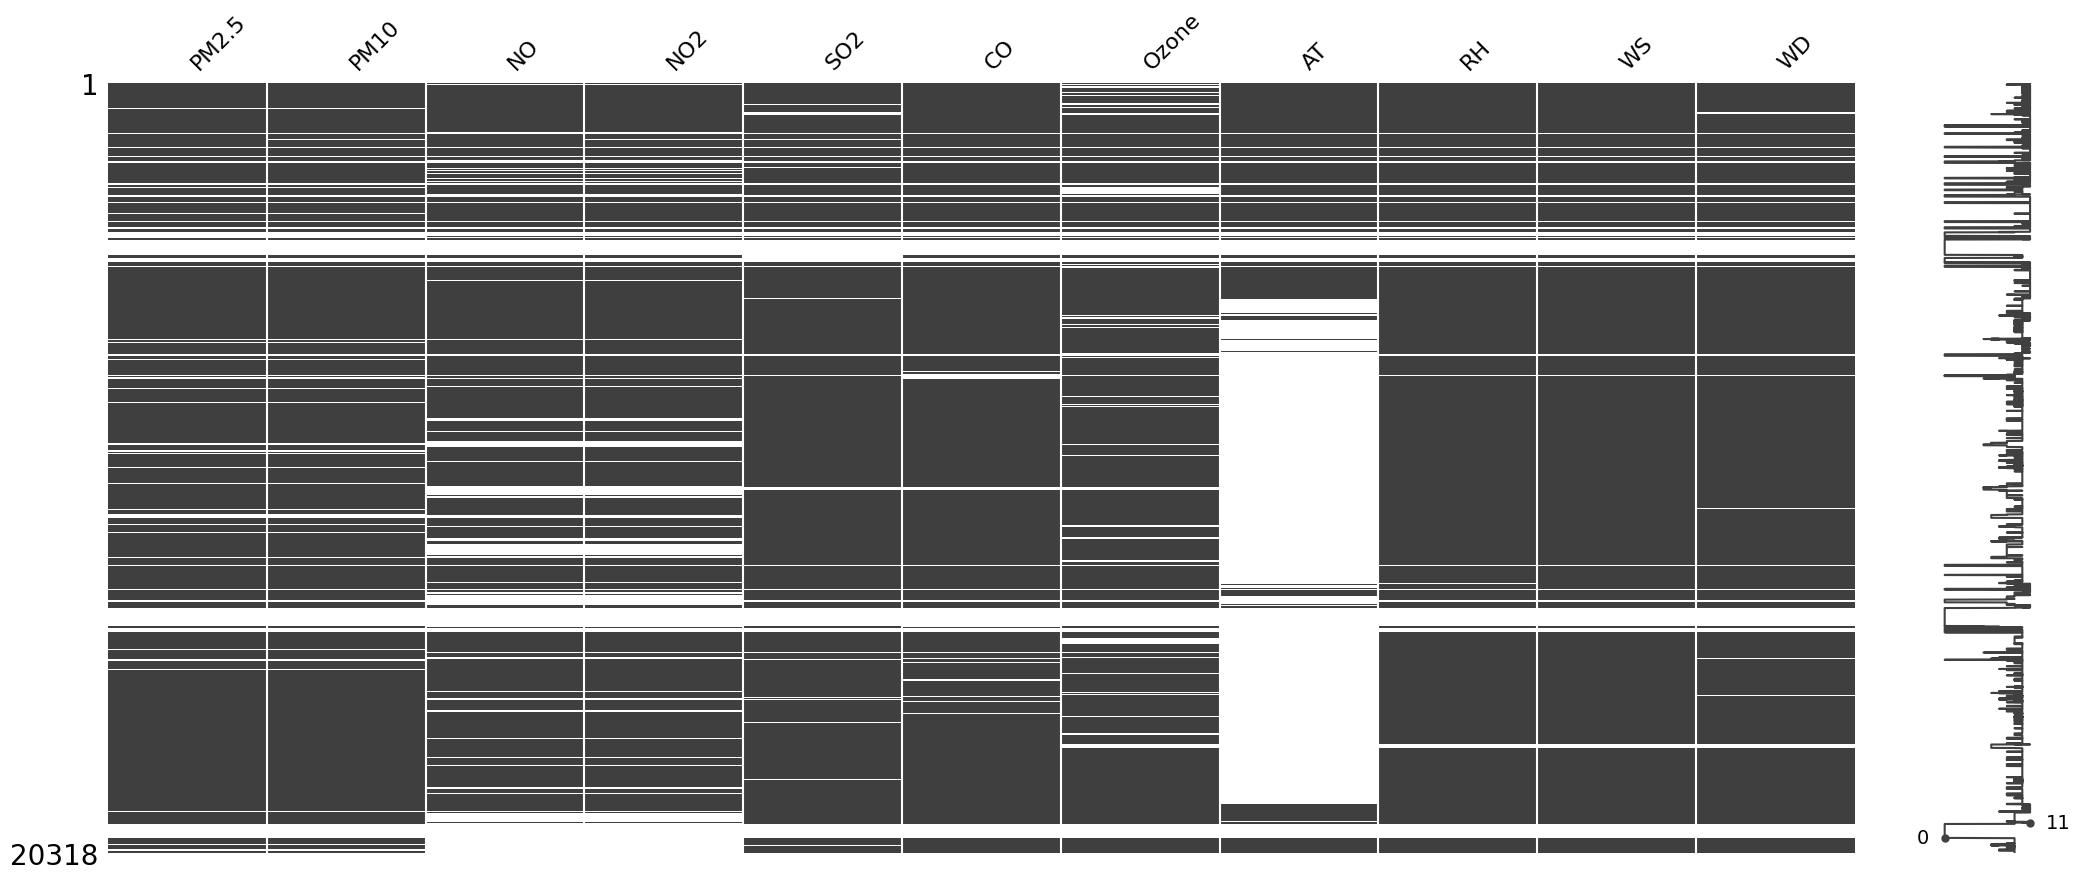

In [46]:
msno.matrix(df.iloc[:,1:])
plt.show()

In [47]:
df.drop("AT", axis=1, inplace=True)

<AxesSubplot:>

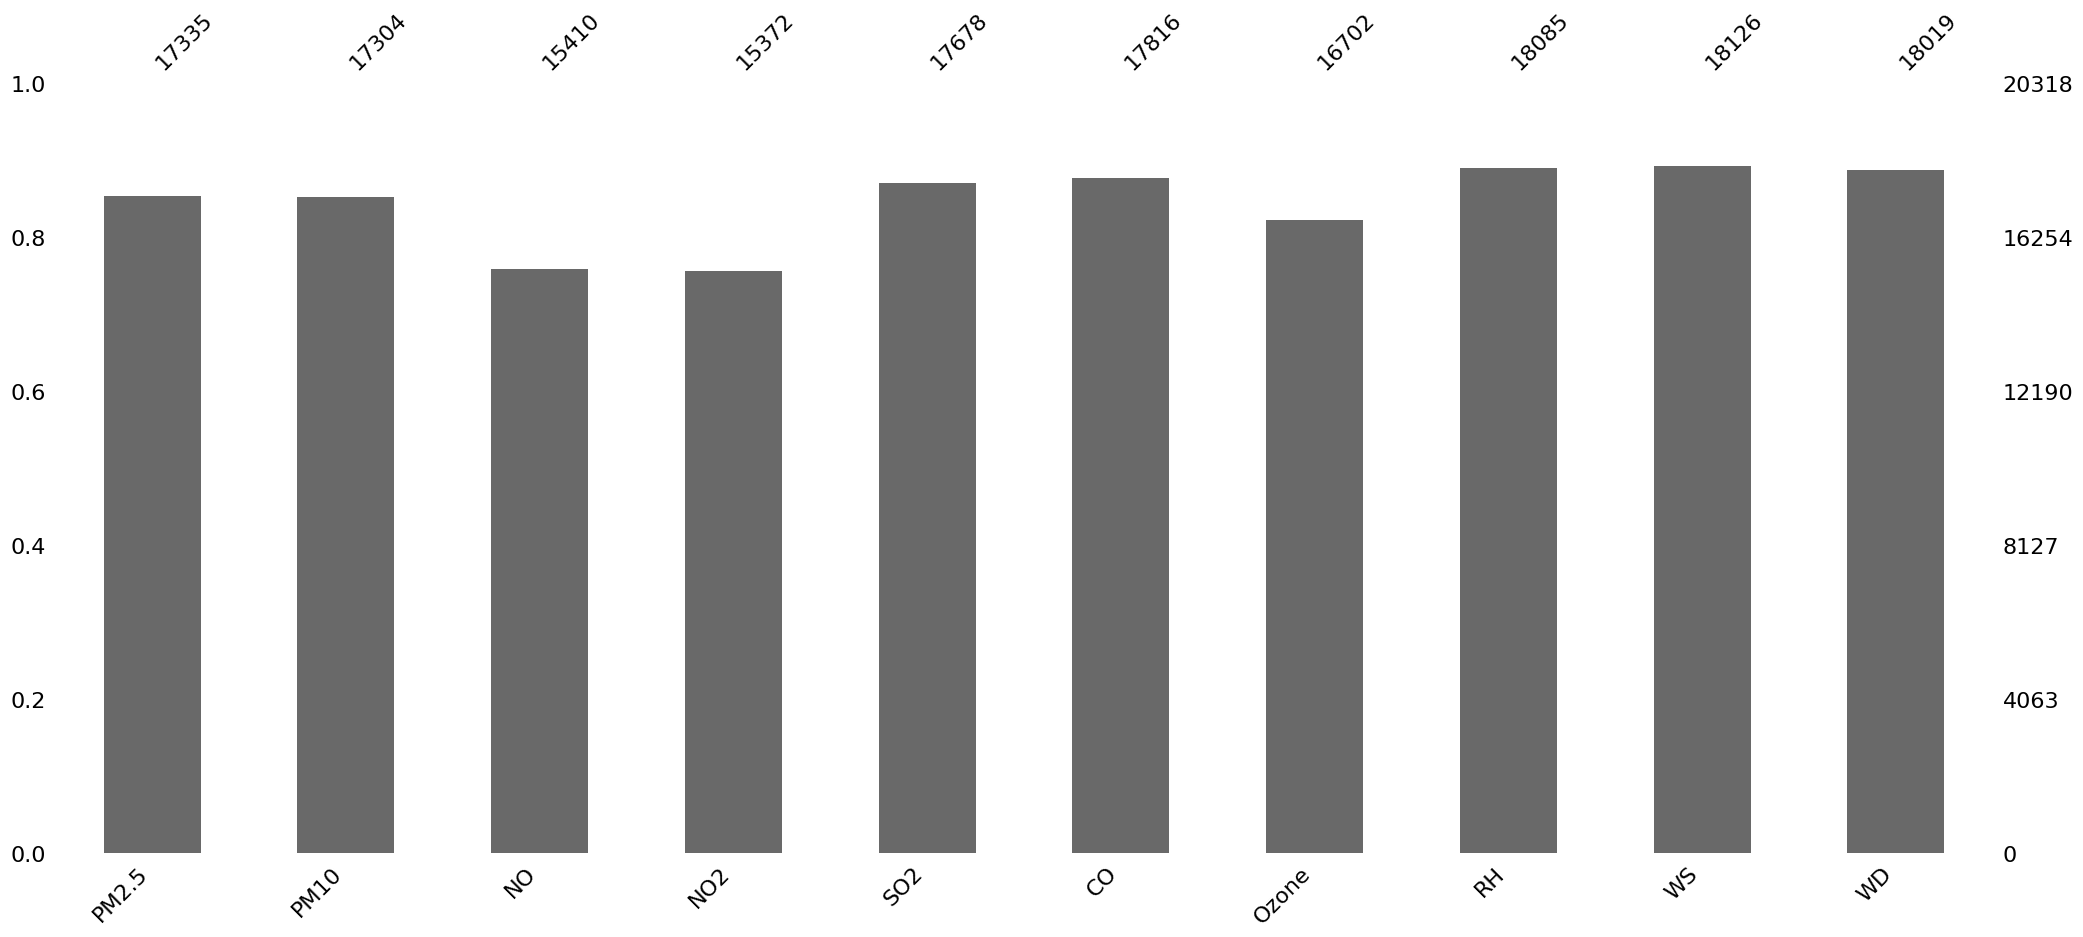

In [48]:
msno.bar(df.iloc[:,1:])

In [49]:
df['HOUR']=df['From Date'].apply(lambda x: int(x.split(' ')[1][:2]))
df['From Date'] = pd.to_datetime(df['From Date'], format = '%d-%m-%Y %H:%M')

0     9
1    10
2    11
3    12
4    13
Name: HOUR, dtype: int64

In [51]:
print('Count of missing values:\n',df.shape[0]-df.count())

Count of missing values:
 From Date       0
PM2.5        2983
PM10         3014
NO           4908
NO2          4946
SO2          2640
CO           2502
Ozone        3616
RH           2233
WS           2192
WD           2299
HOUR            0
dtype: int64


In [53]:
df.set_index('From Date',inplace=True)
df['MONTH']=df.index.month     #Create month column (Run once)
df.reset_index(inplace=True)

In [54]:
cols=['SO2','CO','Ozone','PM2.5','PM10','NO','RH','NO2','WS','WD']
for col in cols:
  df[col]=df[col].fillna(df.groupby(['MONTH','HOUR'])[col].transform('mean'))

In [55]:
print('Count of missing values:\n',df.shape[0]-df.count())

Count of missing values:
 From Date    0
PM2.5        0
PM10         0
NO           0
NO2          0
SO2          0
CO           0
Ozone        0
RH           0
WS           0
WD           0
HOUR         0
MONTH        0
dtype: int64


In [56]:
df.to_csv('./chakala_cleaned.csv', index=False)

In [57]:
df=pd.read_csv('./kurla.csv')
df.drop("To Date", axis=1, inplace=True)
df.head()

,From Date,PM2.5,PM10,NO,NO2,SO2,CO,WD,WS,RH,Ozone,AT
0,01-06-2019 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-06-2019 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-06-2019 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-06-2019 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-06-2019 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df['HOUR']=df['From Date'].apply(lambda x: int(x.split(' ')[1][:2]))
# df.HOUR.head()
df['From Date'] = pd.to_datetime(df['From Date'], format = '%d-%m-%Y %H:%M')
# df['From Date']
df.set_index('From Date',inplace=True)
df['MONTH']=df.index.month     #Create month column (Run once)
df.reset_index(inplace=True)
cols=['SO2','CO','Ozone','PM2.5','PM10','NO','NO2','RH','WS','WD','AT']
for col in cols:
  df[col]=df[col].fillna(df.groupby(['MONTH','HOUR'])[col].transform('mean'))

In [59]:
print('Count of missing values:\n',df.shape[0]-df.count())


Count of missing values:
 From Date    0
PM2.5        0
PM10         0
NO           0
NO2          0
SO2          0
CO           0
WD           0
WS           0
RH           0
Ozone        0
AT           0
HOUR         0
MONTH        0
dtype: int64


In [60]:
df.to_csv('./kurla_cleaned.csv', index=False)

<b>EDA</b>

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [62]:
# Load the data into a pandas DataFrame
airport_data = pd.read_csv('./airport_cleaned.csv')
chakala_data= pd.read_csv('./chakala_cleaned.csv')
kurla_data= pd.read_csv('./kurla_cleaned.csv')

In [63]:
# Convert the 'Date' column to a datetime object
airport_data['From Date'] = pd.to_datetime(airport_data['From Date'])
chakala_data['From Date'] = pd.to_datetime(airport_data['From Date'])
kurla_data['From Date'] = pd.to_datetime(airport_data['From Date'])


In [64]:

# Extract the month, season, and hour from the 'Date' column
airport_data['Month'] = airport_data['From Date'].dt.month
airport_data['Season'] = (airport_data['Month'] % 12 + 3) // 3
airport_data['Hour'] = airport_data['HOUR']
airport_data['Week'] = airport_data['From Date'].dt.dayofweek


# Extract the month, season, and hour from the 'Date' column
chakala_data['Month'] = chakala_data['From Date'].dt.month
chakala_data['Season'] = (chakala_data['Month'] % 12 + 3) // 3
chakala_data['Hour'] = chakala_data['HOUR']

# Extract the month, season, and hour from the 'Date' column
kurla_data['Month'] = kurla_data['From Date'].dt.month
kurla_data['Season'] = (kurla_data['Month'] % 12 + 3) // 3
kurla_data['Hour'] = kurla_data['HOUR']


In [66]:
# Group the data by month, season, and hour and calculate the mean concentration of each pollutant
grouped_month = airport_data.groupby('Month').mean()
grouped_season = airport_data.groupby('Season').mean()
grouped_hour = airport_data.groupby('Hour').mean()
grouped_week = airport_data.groupby('Week').mean()
# Group the data by month, season, and hour and calculate the mean concentration of each pollutant
grouped_month1 = chakala_data.groupby('Month').mean()
grouped_season1 = chakala_data.groupby('Season').mean()
grouped_hour1 = chakala_data.groupby('Hour').mean()
# Group the data by month, season, and hour and calculate the mean concentration of each pollutant
grouped_month2 = kurla_data.groupby('Month').mean()
grouped_season2 = kurla_data.groupby('Season').mean()
grouped_hour2 = kurla_data.groupby('Hour').mean()

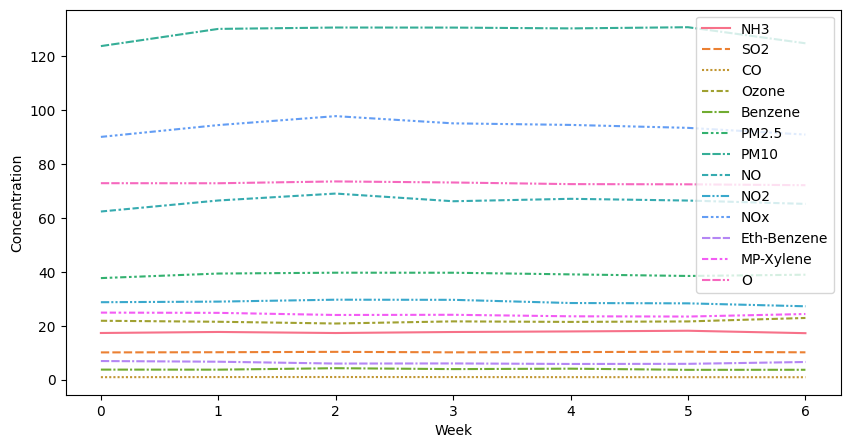

In [67]:
# Plot the mean concentration of each pollutant by month, season, and hour
plt.figure(figsize=(10,5))
sns.lineplot(data=grouped_week[['NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'Eth-Benzene', 'MP-Xylene', 'O']])
plt.xlabel('Week')
plt.title('Pollutant Concentration by Week (Airport)')
plt.ylabel('Concentration')
plt.show()

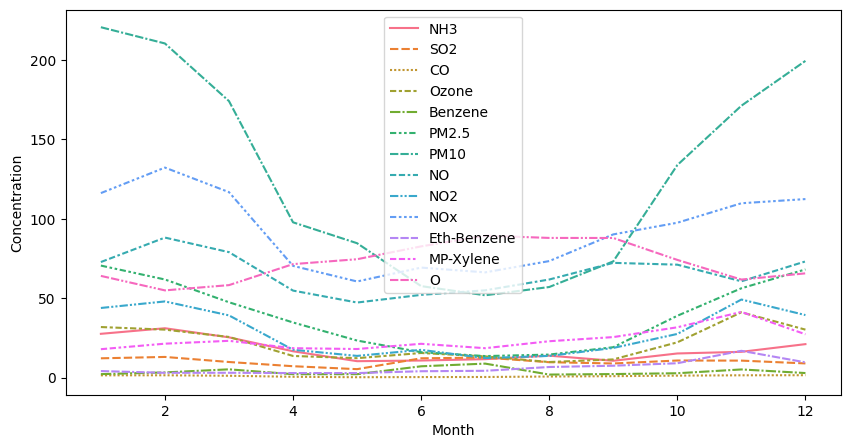

In [68]:
# Plot the mean concentration of each pollutant by month, season, and hour
plt.figure(figsize=(10,5))
sns.lineplot(data=grouped_month[['NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'Eth-Benzene', 'MP-Xylene', 'O']])
plt.xlabel('Month')
plt.ylabel('Concentration')
plt.title('Pollutant Concentration by Month (Airport)')
plt.show()


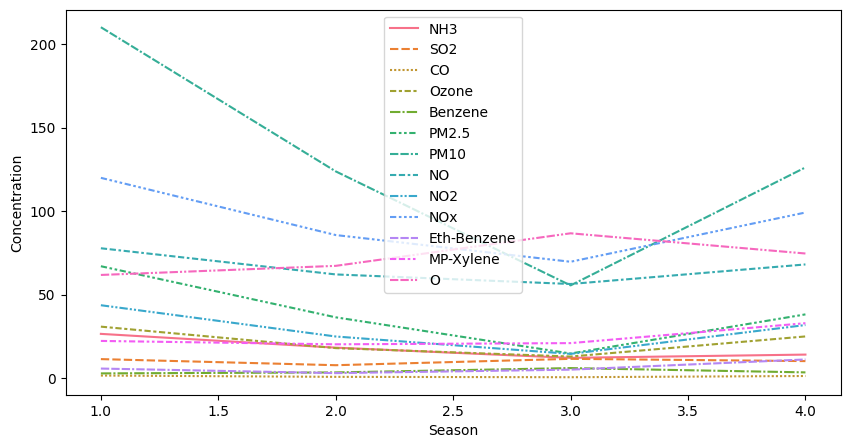

In [69]:
plt.figure(figsize=(10,5))
sns.lineplot(data=grouped_season[['NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'Eth-Benzene', 'MP-Xylene', 'O']])
plt.xlabel('Season')
plt.ylabel('Concentration')
plt.title('Pollutant Concentration by Season (Airport)')
plt.show()


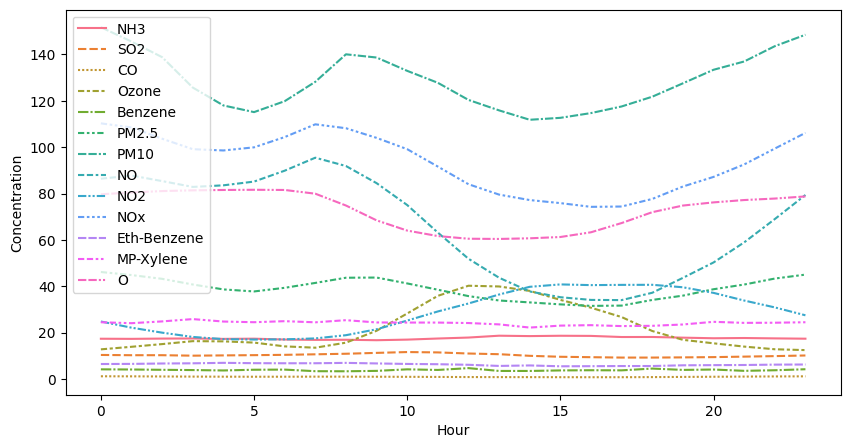

In [70]:
plt.figure(figsize=(10,5))
sns.lineplot(data=grouped_hour[['NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'Eth-Benzene', 'MP-Xylene', 'O']])
plt.xlabel('Hour')
plt.ylabel('Concentration')
plt.title('Pollutant Concentration by Hour (Airport)')
plt.show()

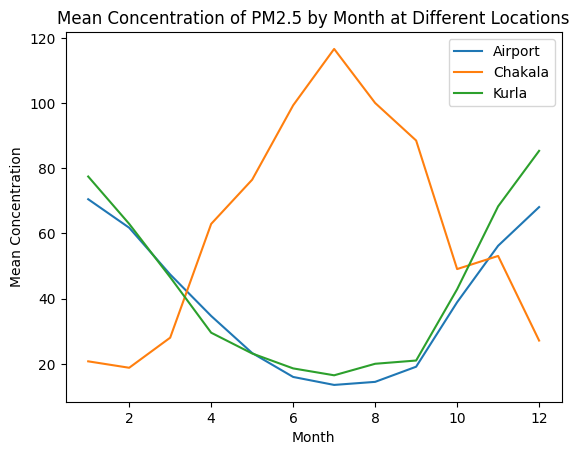

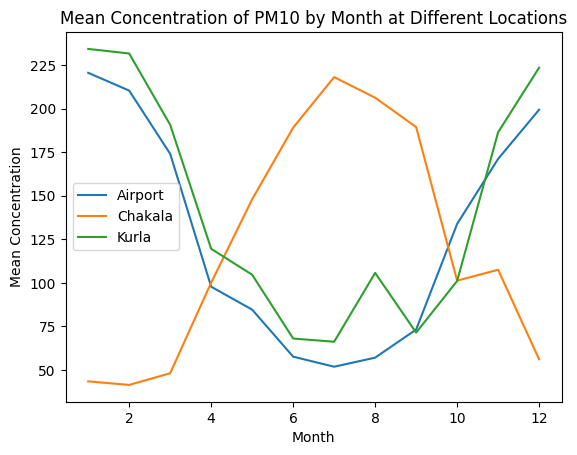

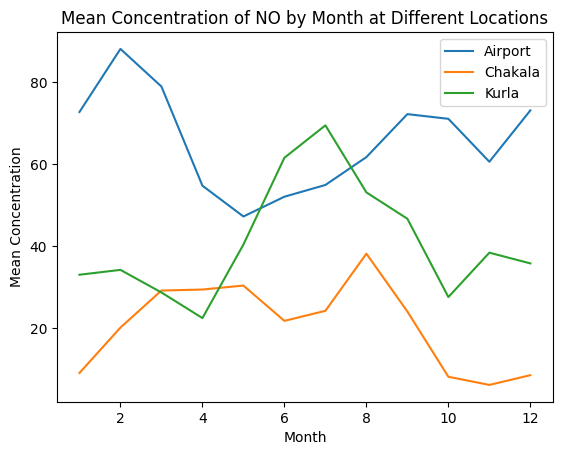

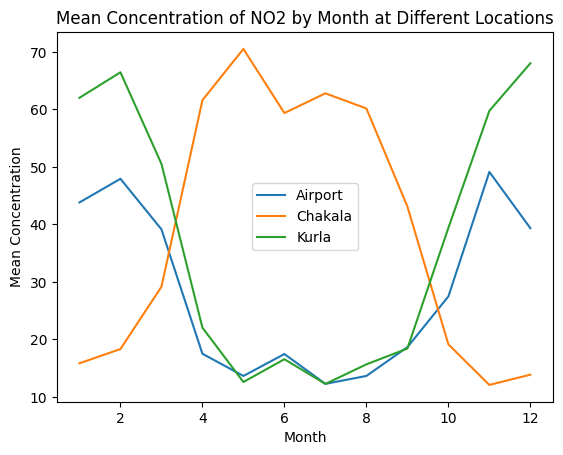

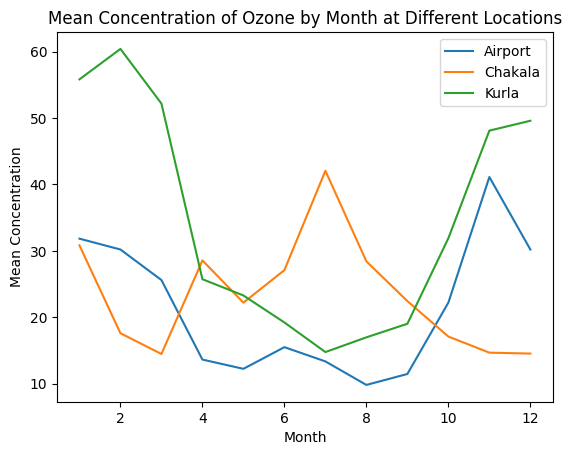

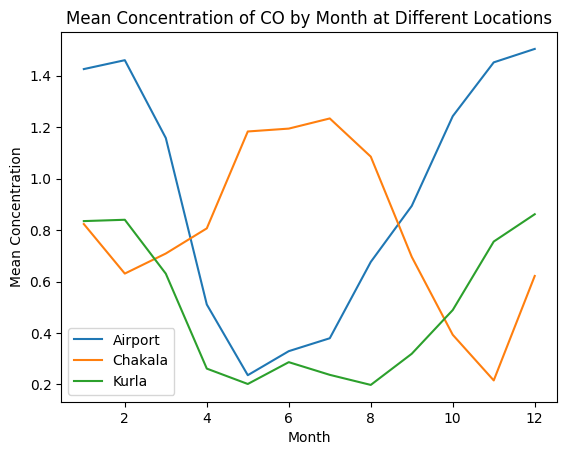

In [72]:
# Select a pollutants to plot
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'Ozone', 'CO']
for pollutant in pollutants:
    # Extract the month and concentration for the selected pollutant and locations
    df_airport_pollutant = airport_data.loc[:, ['From Date', pollutant]]
    df_airport_pollutant['month'] = df_airport_pollutant['From Date'].dt.month
    monthly_mean_airport = df_airport_pollutant.groupby('month')[pollutant].mean()

    df_chakala_pollutant = chakala_data.loc[:, ['From Date', pollutant]]
    df_chakala_pollutant['month'] = df_chakala_pollutant['From Date'].dt.month
    monthly_mean_chakala = df_chakala_pollutant.groupby('month')[pollutant].mean()

    df_kurla_pollutant = kurla_data.loc[:, ['From Date', pollutant]]
    df_kurla_pollutant['month'] = df_kurla_pollutant['From Date'].dt.month
    monthly_mean_kurla = df_kurla_pollutant.groupby('month')[pollutant].mean()

    # Plot the mean concentration by month for all three locations
    plt.plot(monthly_mean_airport, label='Airport')
    plt.plot(monthly_mean_chakala, label='Chakala')
    plt.plot(monthly_mean_kurla, label='Kurla')
    plt.xlabel('Month')
    plt.ylabel('Mean Concentration')
    plt.title('Mean Concentration of {} by Month at Different Locations'.format(pollutant))
    plt.legend()
    plt.show()

In [73]:
airport_data['Location'] = 'airport'
chakala_data['Location'] = 'chakala'
kurla_data['Location'] = 'kurla'
# Concatenate the data from all three locations into a single dataframe
pollutant_data = pd.concat([airport_data, kurla_data, chakala_data])

In [74]:
# Extract the features (columns) to be used in the clustering analysis
features = pollutant_data[['PM2.5', 'PM10', 'NO', 'NO2', 'SO2', 'CO', 'Ozone', 'WS', 'WD', 'HOUR', 'MONTH']]

In [75]:
# Define the number of clusters to be identified by the K-means algorithm
n_clusters = 3

In [76]:
# Create a K-means clustering model and fit it to the data
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(features)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [77]:
# Add a new column to the pollutant data dataframe to store the cluster labels
pollutant_data['Cluster'] = kmeans.labels_

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


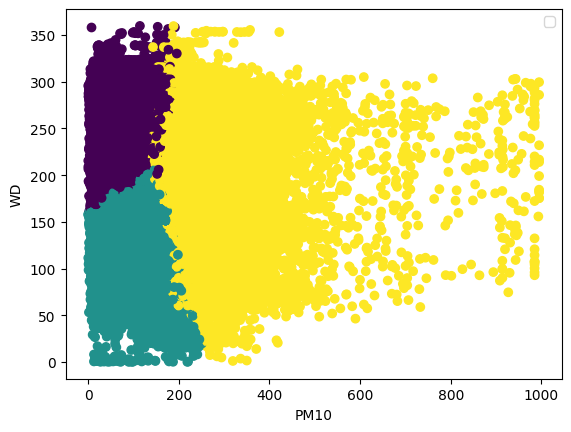

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[ 24.68040191  79.82893899  44.40534846  22.65524101  13.78784165
    0.51313921  21.32399944   1.09239787 246.54140106  12.39358366
    6.61364638]
 [ 44.00073952 103.40172085  38.94410597  31.65478409  14.18032784
    0.69531499  26.98376029   0.95973013 116.38534831   9.49406709
    7.39518521]
 [ 88.77852353 263.46438886  58.07386489  59.92676196  18.05439627
    1.23315971  38.16211011   0.8406703  201.72266343  12.29651746
    5.29804298]]


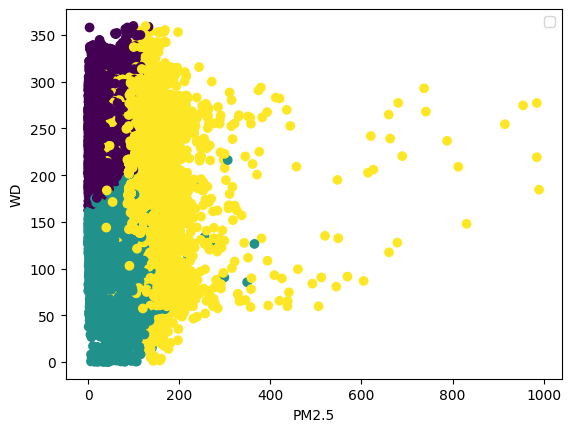

[[ 24.68040191  79.82893899  44.40534846  22.65524101  13.78784165
    0.51313921  21.32399944   1.09239787 246.54140106  12.39358366
    6.61364638]
 [ 44.00073952 103.40172085  38.94410597  31.65478409  14.18032784
    0.69531499  26.98376029   0.95973013 116.38534831   9.49406709
    7.39518521]
 [ 88.77852353 263.46438886  58.07386489  59.92676196  18.05439627
    1.23315971  38.16211011   0.8406703  201.72266343  12.29651746
    5.29804298]]


In [78]:
cols=['PM10', 'PM2.5']
compare=['WD']
for col in cols:
    for com in compare:
        if col!=com:
            # Visualize the clusters using a scatter plot
            plt.scatter(pollutant_data[col], pollutant_data[com], c=pollutant_data['Cluster'])
            plt.xlabel(col)
            plt.ylabel(com)
            plt.legend()
            plt.show()

            # Print the centroids (mean values) of each cluster
            print(kmeans.cluster_centers_)

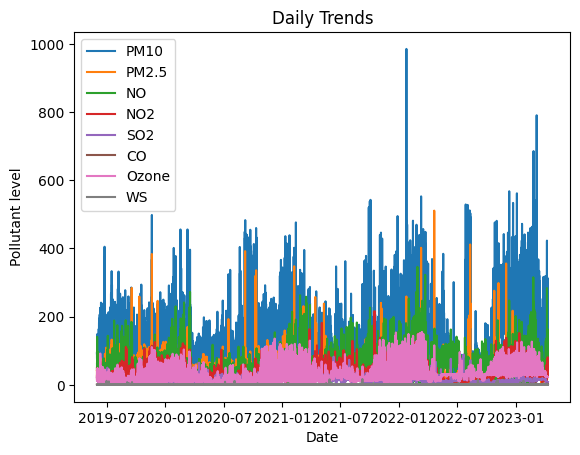

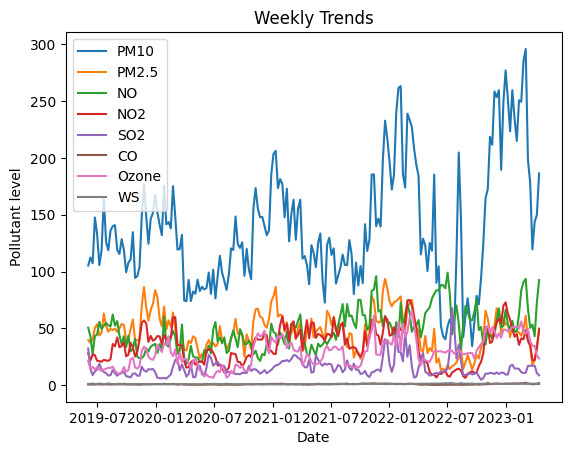

In [79]:
# Concatenate the data from all three sources
pollutant_data = pd.concat([kurla_data, airport_data, chakala_data])

# Convert the 'Date' column to a datetime object
pollutant_data['From Date'] = pd.to_datetime(pollutant_data['From Date'])

# Group the data by day and calculate the mean of each pollutant for each day
daily_pollutant_means = pollutant_data.groupby(['From Date']).mean()

# Group the data by week and calculate the mean of each pollutant for each week
weekly_pollutant_means = pollutant_data.groupby(pd.Grouper(key='From Date', freq='W')).mean()

# Plot daily trends for each pollutant
pollutants = ['PM10', 'PM2.5', 'NO', 'NO2', 'SO2', 'CO', 'Ozone', 'WS']
for pollutant in pollutants:
    plt.plot(daily_pollutant_means.index, daily_pollutant_means[pollutant], label=pollutant)

plt.xlabel('Date')
plt.ylabel('Pollutant level')
plt.title('Daily Trends')
plt.legend()
plt.show()

# Plot weekly trends for each pollutant
for pollutant in pollutants:
    plt.plot(weekly_pollutant_means.index, weekly_pollutant_means[pollutant], label=pollutant)

plt.xlabel('Date')
plt.ylabel('Pollutant level')
plt.title('Weekly Trends')
plt.legend()
plt.show()


<b>Skewness and Removing outliers</b>

In [81]:
df = pd.read_csv('./airport_cleaned.csv', parse_dates=['From Date'])
df.head()

,From Date,NH3,SO2,CO,Ozone,Benzene,PM2.5,PM10,NO,NO2,NOx,Eth-Benzene,MP-Xylene,O,WS,WD,AT,HOUR,MONTH
0,2019-06-01 00:00:00,8.968447,12.179626,0.373962,13.710286,6.367238,17.086000,58.661489,59.723048,16.579524,76.262476,4.171932,21.877100,87.716774,1.227097,184.529677,27.810215,0,6
1,2019-06-01 01:00:00,9.016863,11.966923,0.349231,13.906923,5.444466,16.093861,51.717188,59.477379,15.399406,74.491359,4.104333,21.602857,87.869348,1.153152,187.873913,27.744130,1,6
2,2019-06-01 02:00:00,9.504804,12.471415,0.305619,13.750286,4.365825,15.659320,54.967634,56.430673,14.609010,70.510865,4.089186,21.700000,88.223226,1.124731,181.798710,27.602903,2,6
3,2019-06-01 03:00:00,9.895050,12.776481,0.294231,14.580286,2.354608,15.780962,53.554946,56.006408,13.140686,68.903107,4.638222,23.246042,88.747065,1.141848,176.929457,27.411304,3,6
4,2019-06-01 04:00:00,10.109903,13.154128,0.298302,14.143962,4.111058,14.980377,53.374362,58.782404,13.335400,71.507692,4.162989,21.476224,88.678602,1.128280,173.737204,27.353011,4,6


C:\Users\HP\AppData\Local\Temp\ipykernel_14912\2134411511.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  display(df.skew())


NH3             4.642032
SO2             3.035418
CO              0.848790
Ozone           2.822309
Benzene        16.931789
PM2.5           4.446476
PM10            1.981250
NO              1.715760
NO2             1.669439
NOx             1.454079
Eth-Benzene    11.561283
MP-Xylene       5.747266
O              -0.548206
WS              4.717906
WD             -0.242565
AT              0.172617
HOUR            0.000088
MONTH          -0.061831
dtype: float64

<AxesSubplot:xlabel='PM10', ylabel='Count'>

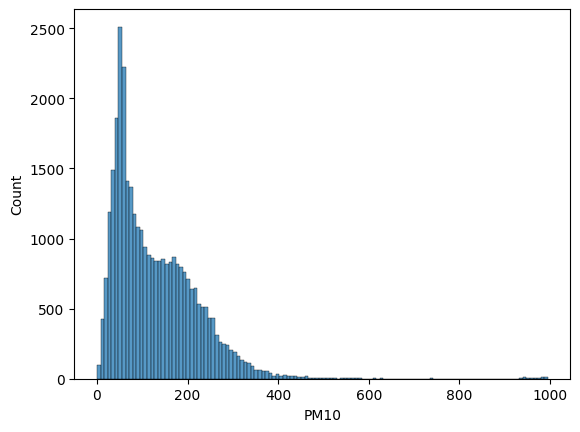

In [83]:
display(df.skew())

# Plot a histogram of the data
display(sns.histplot(df['PM10'], kde=False))

<AxesSubplot:>

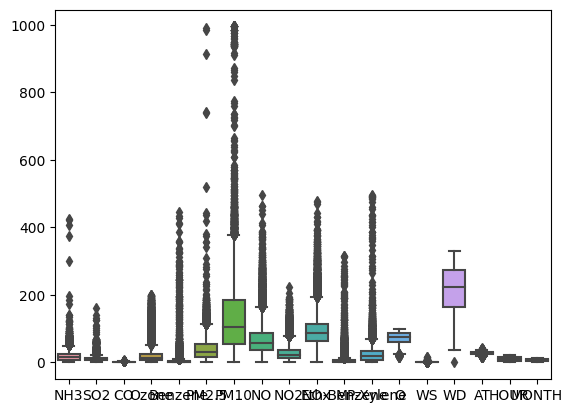

In [82]:
# Plot a box plot of the data
sns.boxplot(data=df)

In [84]:
# Remove the outliers
# Compute the first and third quartiles (Q1 and Q3)
Q1 = df.iloc[:, 1:12].quantile(0.05)
Q3 = df.iloc[:, 1:12].quantile(0.95)

# Compute the interquartile range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

# Replace the outliers with NaN values
df.iloc[:, 1:12] = df.iloc[:, 1:12][(df.iloc[:, 1:12] >= lower) & (df.iloc[:, 1:12] <= upper)]

In [ ]:
print('Count of missing values:\n',df.shape[0]-df.count())

In [85]:
cols=['NH3','SO2','CO','Ozone','Benzene','PM2.5','PM10','NO','NO2','NOx','Eth-Benzene','MP-Xylene','O','WS','WD','AT']
for col in cols:
  df[col]=df[col].fillna(df.groupby(['MONTH','HOUR'])[col].transform('mean'))

<AxesSubplot:>

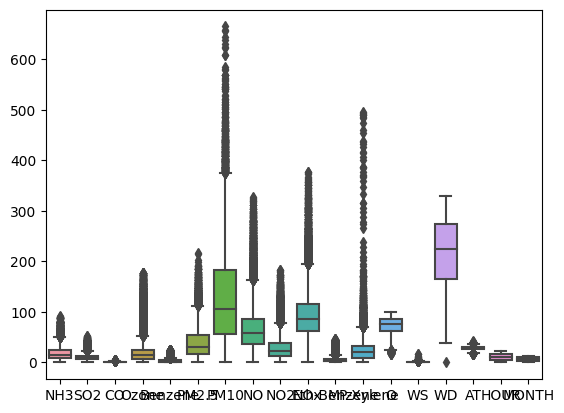

In [86]:
# Plot a box plot of the data
sns.boxplot(data=df)

In [87]:
print('Count of missing values:\n',df.shape[0]-df.count())

Count of missing values:
 From Date      0
NH3            0
SO2            0
CO             0
Ozone          0
Benzene        0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
Eth-Benzene    0
MP-Xylene      0
O              0
WS             0
WD             0
AT             0
HOUR           0
MONTH          0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_14912\663935864.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  display(df.skew())


NH3            1.232823
SO2            1.652023
CO             0.827032
Ozone          2.682223
Benzene        2.336922
PM2.5          1.220802
PM10           1.025759
NO             1.466077
NO2            1.606635
NOx            1.327905
Eth-Benzene    2.937981
MP-Xylene      5.747266
O             -0.548206
WS             4.717906
WD            -0.242565
AT             0.172617
HOUR           0.000088
MONTH         -0.061831
dtype: float64

<AxesSubplot:xlabel='PM10', ylabel='Count'>

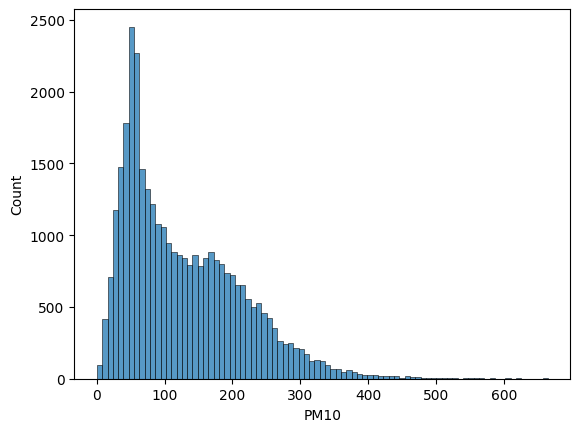

In [88]:
# Checking the skewness again
display(df.skew())

# Plot a histogram of the data
display(sns.histplot(df['PM10'], kde=False))

In [94]:
# Save the cleaned data to a CSV file
df.to_csv("./airport_outliers.csv")

In [95]:
# Load raw data and cleaned data into dataframes
raw_df = pd.read_csv('./airport.csv')
cleaned_df = pd.read_csv('./airport_cleaned.csv')
outlier_df = pd.read_csv('./airport_outliers.csv')
kurla_cleaned_df = pd.read_csv('./kurla_cleaned.csv')
chakala_cleaned_df = pd.read_csv('./chakala_cleaned.csv')

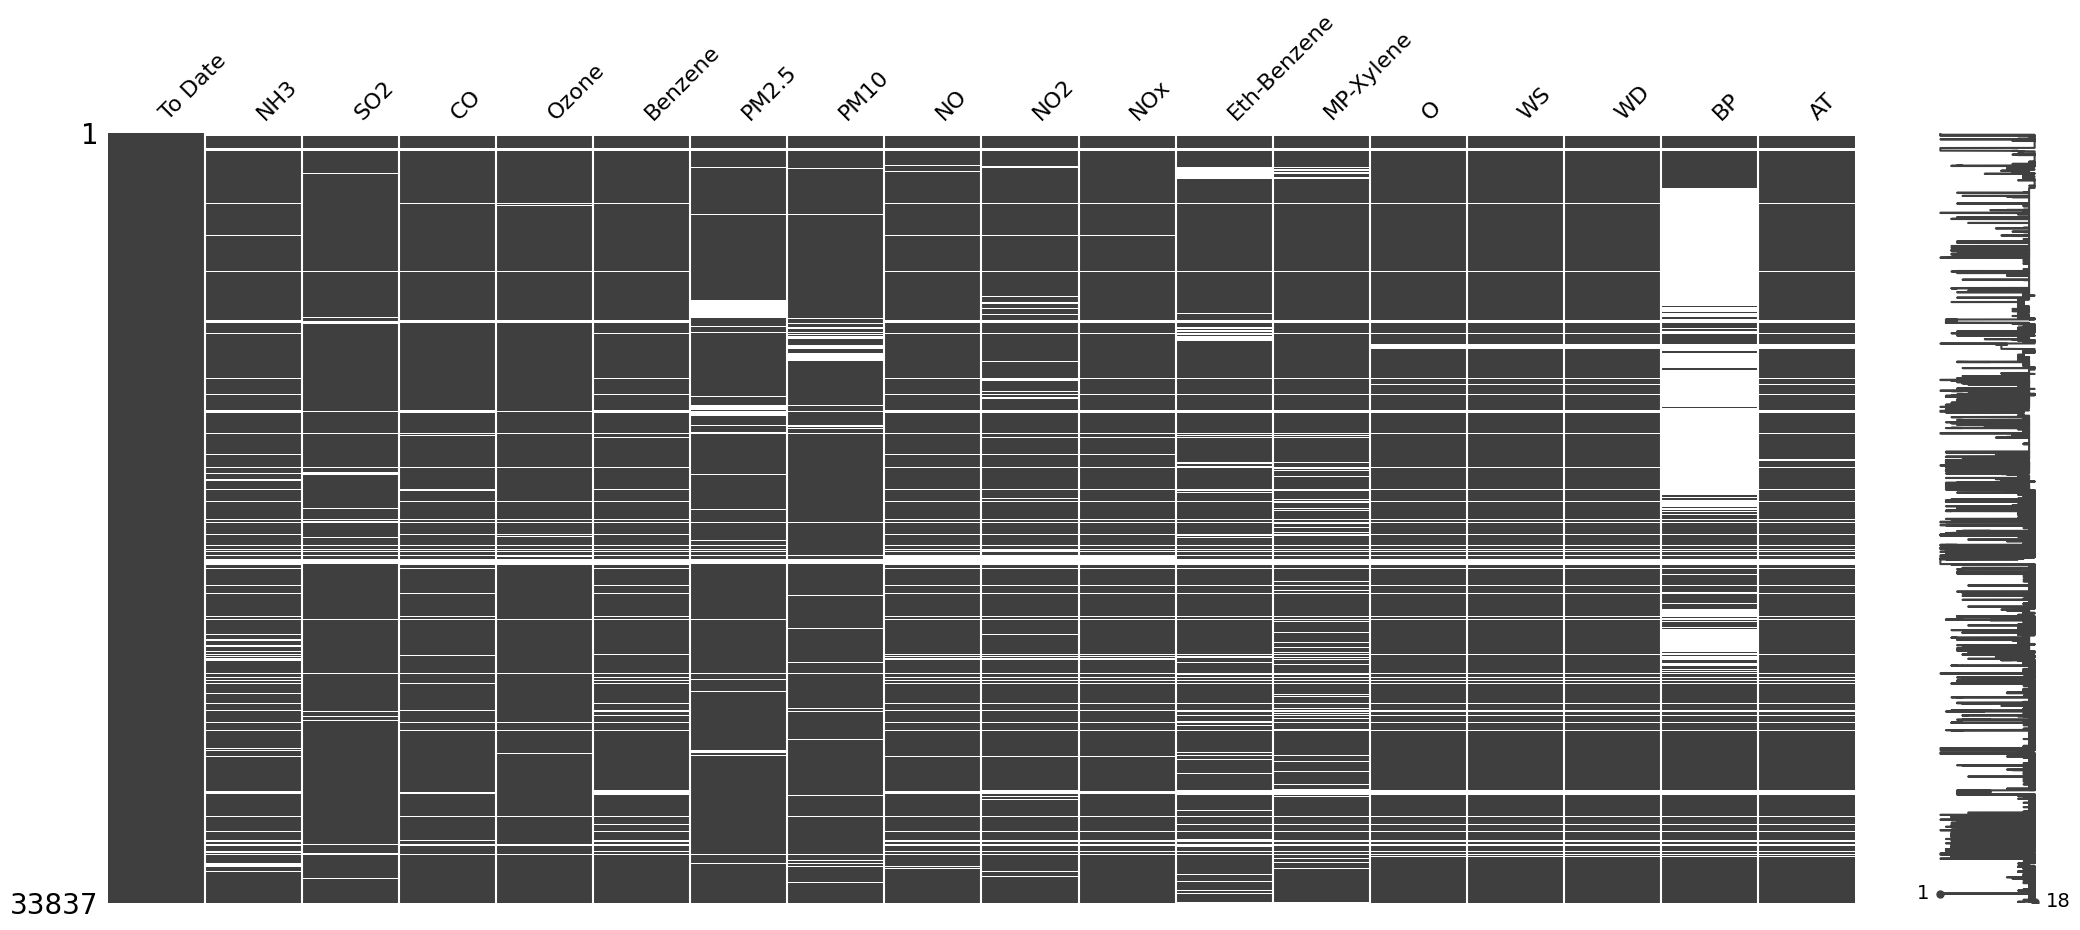

In [96]:
# Visualize the missingness 
msno.matrix(raw_df.iloc[:,1:])
plt.show()

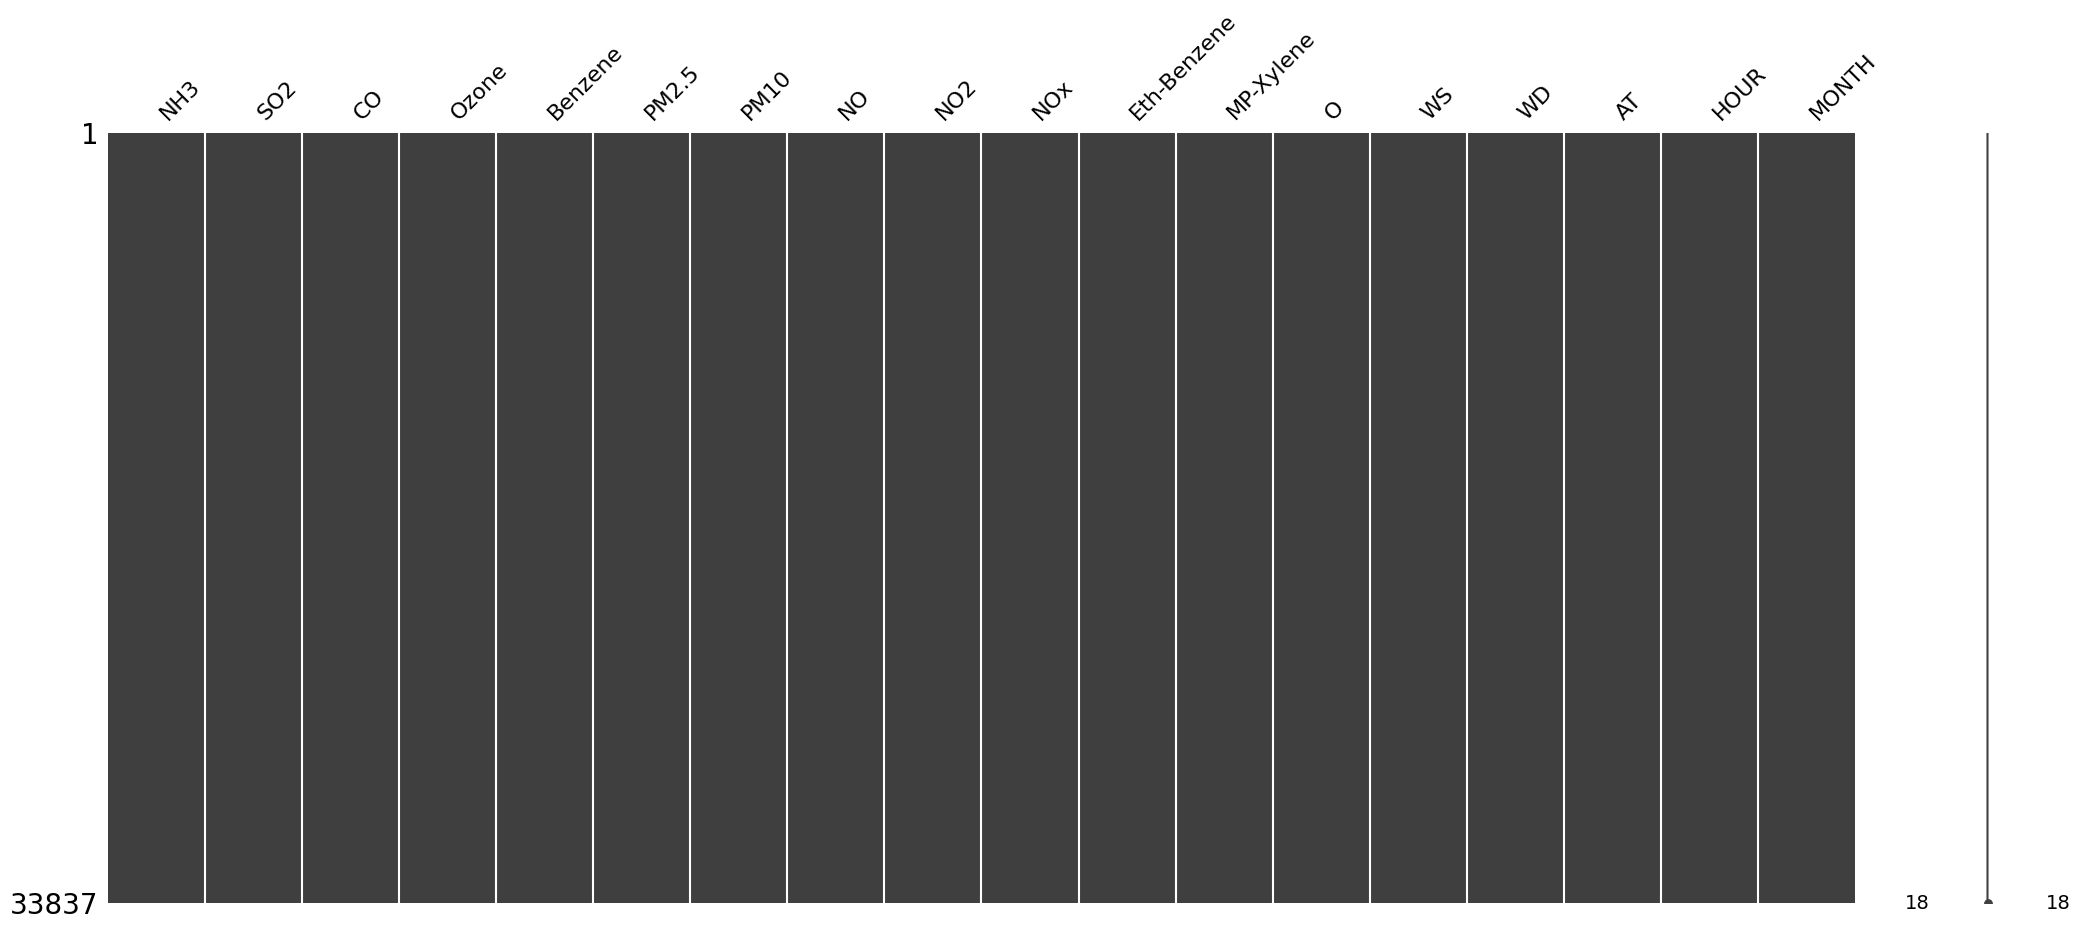

In [97]:
# Visualize the missingness 
msno.matrix(cleaned_df.iloc[:,1:])
plt.show()

In [98]:
# Check basic properties of raw data
print('Raw Data Info:')
print(raw_df.iloc[:,2:7].info())
print('Raw Data Description:')
print(raw_df.iloc[:,2:7].describe())


Raw Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33837 entries, 0 to 33836
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   NH3      30084 non-null  float64
 1   SO2      31856 non-null  float64
 2   CO       31485 non-null  float64
 3   Ozone    31932 non-null  float64
 4   Benzene  30884 non-null  float64
dtypes: float64(5)
memory usage: 1.3 MB
None
Raw Data Description:
                NH3           SO2            CO         Ozone       Benzene
count  30084.000000  31856.000000  31485.000000  31932.000000  30884.000000
mean      17.584587     10.207117      0.971513     21.842142      3.821862
std       13.815314      7.454350      0.710668     25.367688     14.846450
min        0.010000      0.010000      0.000000      0.010000      0.000000
25%        7.460000      5.870000      0.360000      6.120000      0.340000
50%       15.270000      8.840000      0.820000     14.725000      1.350000
75%       24

In [99]:
# Check basic properties of processed data
print('Processed Data Info:')
print(cleaned_df.iloc[:,:10].info())
print('Processed Data Description:')
print(cleaned_df.iloc[:,:6].describe())

Processed Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33837 entries, 0 to 33836
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   From Date  33837 non-null  object 
 1   NH3        33837 non-null  float64
 2   SO2        33837 non-null  float64
 3   CO         33837 non-null  float64
 4   Ozone      33837 non-null  float64
 5   Benzene    33837 non-null  float64
 6   PM2.5      33837 non-null  float64
 7   PM10       33837 non-null  float64
 8   NO         33837 non-null  float64
 9   NO2        33837 non-null  float64
dtypes: float64(9), object(1)
memory usage: 2.6+ MB
None
Processed Data Description:
                NH3           SO2            CO         Ozone       Benzene
count  33837.000000  33837.000000  33837.000000  33837.000000  33837.000000
mean      17.619088     10.223825      0.958261     21.677612      3.871799
std       13.274060      7.265381      0.700538     24.856793     14.213311
m

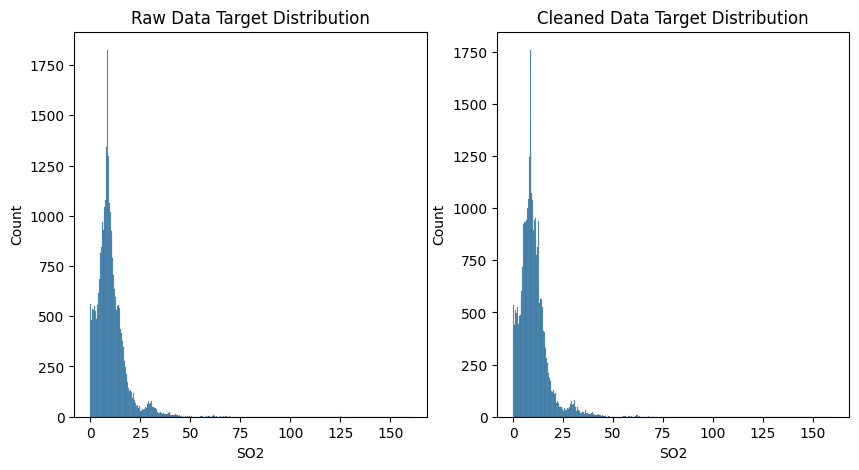

In [100]:
# Compare distribution of target variable between raw data and cleaned data using histogram
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(raw_df['SO2'], ax=axs[0])
sns.histplot(cleaned_df['SO2'], ax=axs[1])
axs[0].set_title('Raw Data Target Distribution')
axs[1].set_title('Cleaned Data Target Distribution')
plt.show()

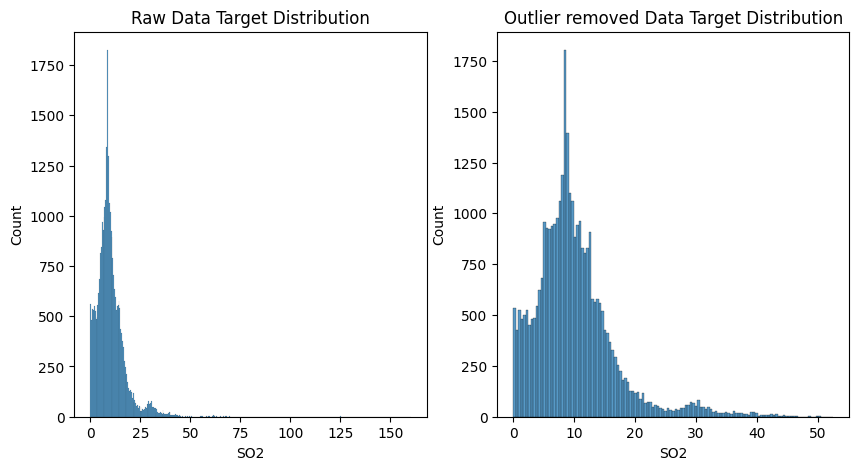

In [101]:
# Compare distribution of target variable between raw data and cleaned data using histogram
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(raw_df['SO2'], ax=axs[0])
sns.histplot(outlier_df['SO2'], ax=axs[1])
axs[0].set_title('Raw Data Target Distribution')
axs[1].set_title('Outlier removed Data Target Distribution')
plt.show()

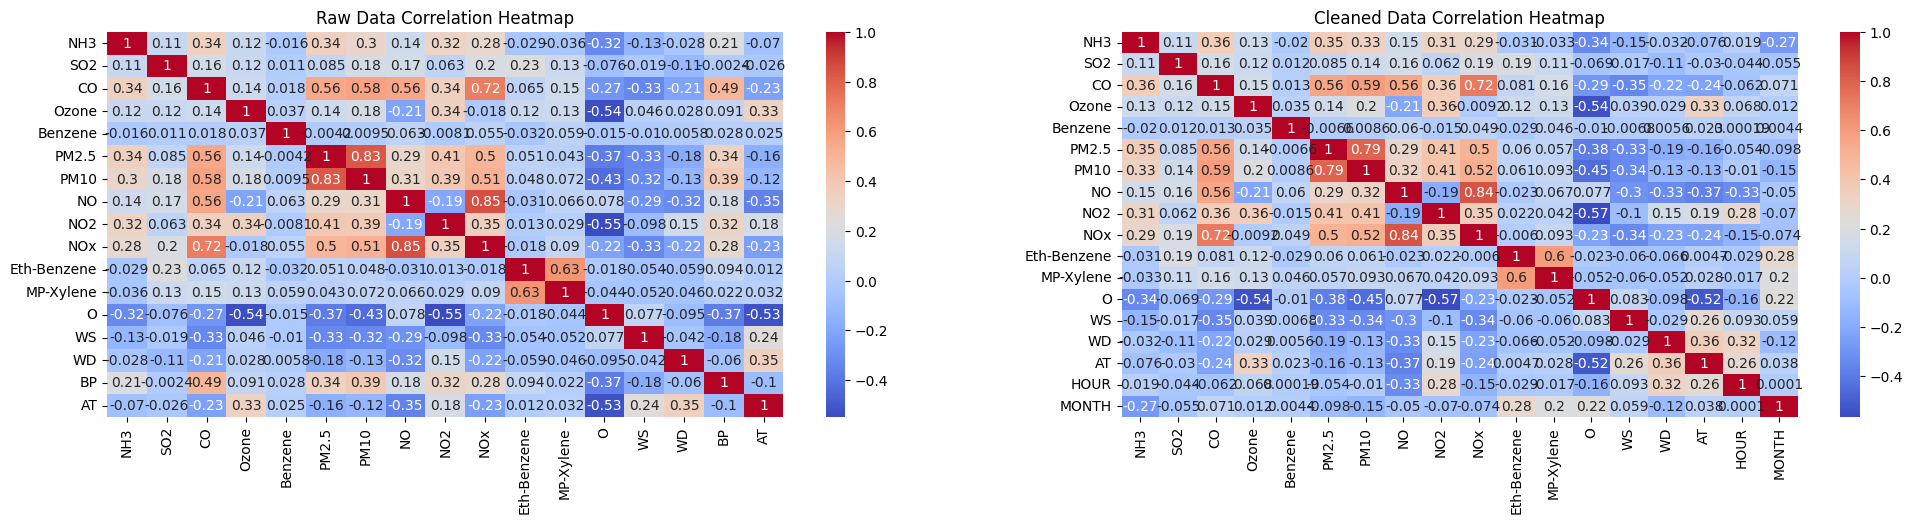

In [102]:
# Compare pairwise correlations between variables in raw data and cleaned data using heatmap
raw_corr = raw_df.corr()
cleaned_corr = cleaned_df.corr()
fig, axs = plt.subplots(1, 2, figsize=(24,5))
sns.heatmap(raw_corr, cmap='coolwarm', annot=True, ax=axs[0])
sns.heatmap(cleaned_corr, cmap='coolwarm', annot=True, ax=axs[1])
axs[0].set_title('Raw Data Correlation Heatmap')
axs[1].set_title('Cleaned Data Correlation Heatmap')
plt.show()


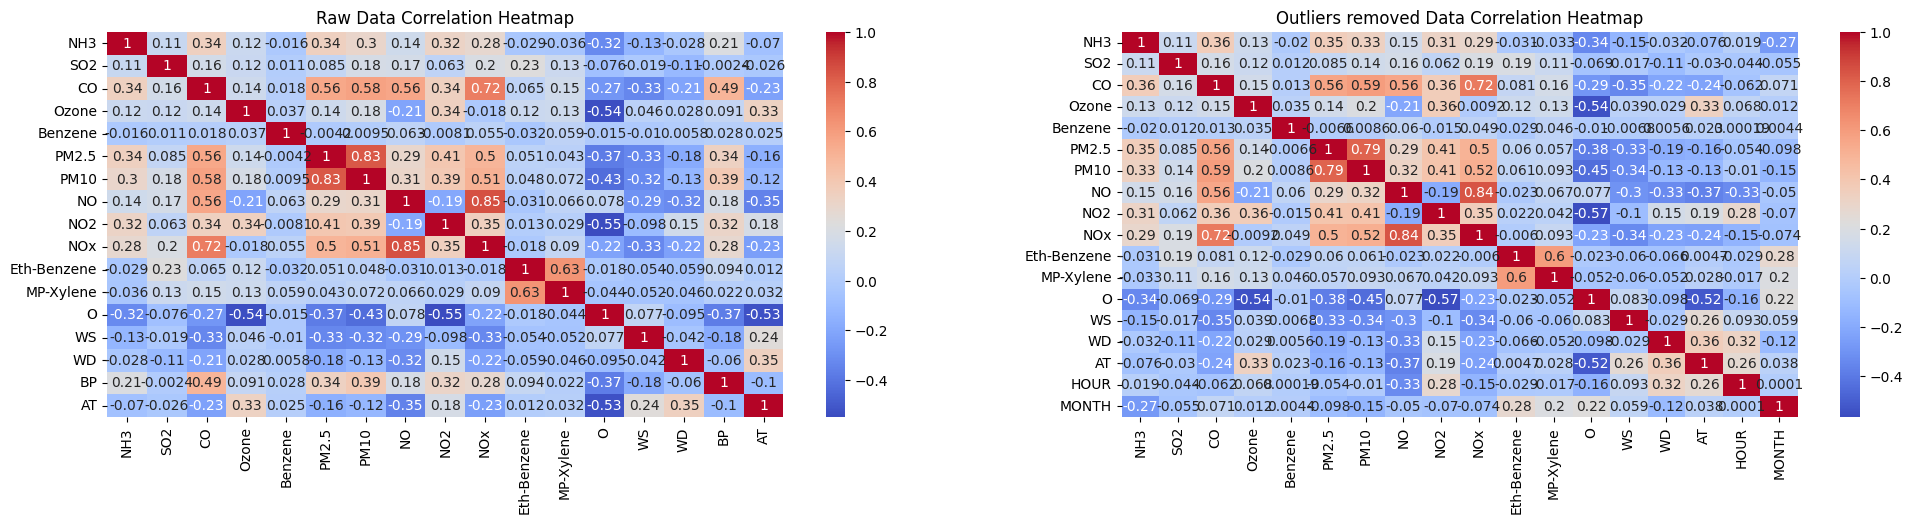

In [103]:
# Compare pairwise correlations between variables in raw data and cleaned data using heatmap
raw_corr = raw_df.corr()
outlier_corr = cleaned_df.corr()
fig, axs = plt.subplots(1, 2, figsize=(24,5))
sns.heatmap(raw_corr, cmap='coolwarm', annot=True, ax=axs[0])
sns.heatmap(outlier_corr, cmap='coolwarm', annot=True, ax=axs[1])
axs[0].set_title('Raw Data Correlation Heatmap')
axs[1].set_title('Outliers removed Data Correlation Heatmap')
plt.show()

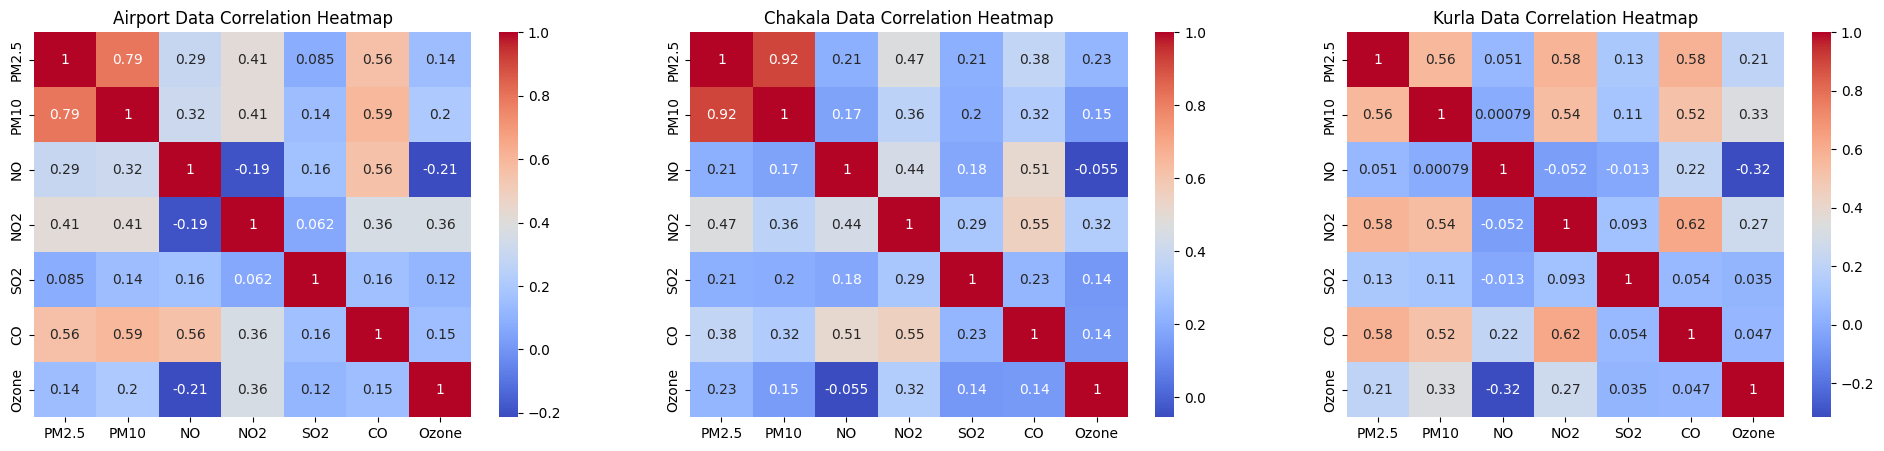

In [104]:
# Compare pairwise correlations between variables in raw data and cleaned data using heatmap
kurla_cleaned_corr = kurla_cleaned_df[['PM2.5', 'PM10', 'NO','NO2', 'SO2', 'CO', 'Ozone']].corr()
chakala_cleaned_corr = chakala_cleaned_df[['PM2.5', 'PM10', 'NO','NO2', 'SO2', 'CO', 'Ozone']].corr()
airport_cleaned_corr = cleaned_df[['PM2.5', 'PM10', 'NO','NO2', 'SO2', 'CO', 'Ozone']].corr()

# kurla_cleaned_corr = kurla_cleaned_df[['PM2.5', 'PM10','NO2', 'SO2', 'CO', 'Ozone']].corr()
# chakala_cleaned_corr = chakala_cleaned_df[['PM2.5', 'PM10','NO2', 'SO2', 'CO', 'Ozone']].corr()
# airport_cleaned_corr = cleaned_df[['PM2.5', 'PM10','NO2', 'SO2', 'CO', 'Ozone']].corr()

fig, axs = plt.subplots(1, 3, figsize=(24,5))
sns.heatmap(airport_cleaned_corr, cmap='coolwarm', annot=True, ax=axs[0])
sns.heatmap(chakala_cleaned_corr, cmap='coolwarm', annot=True, ax=axs[1])
sns.heatmap(kurla_cleaned_corr, cmap='coolwarm', annot=True, ax=axs[2])

axs[0].set_title('Airport Data Correlation Heatmap')
axs[1].set_title('Chakala Data Correlation Heatmap')
axs[2].set_title('Kurla Data Correlation Heatmap')
plt.show()